In [281]:

import sys
import os
from PIL import Image
import torchvision.utils as vutils

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

from models import Generator, Discriminator, FeatureExtractor


try:
    os.makedirs('output/high_res_fake')
    os.makedirs('output/high_res_real')
    os.makedirs('output/low_res')
except OSError:
    pass

imageSize = 32
upSampling = 2

transform = transforms.Compose([#transforms.RandomCrop(imageSize*upSampling),
                                transforms.ToTensor()])

normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                std = [0.229, 0.224, 0.225])

scale = transforms.Compose([transforms.ToPILImage(),
#                             transforms.Resize(imageSize),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                std = [0.229, 0.224, 0.225])
                            ])

# Equivalent to un-normalizing ImageNet (for correct visualization)
unnormalize = transforms.Normalize(mean = [-2.118, -2.036, -1.804], std = [4.367, 4.464, 4.444])
unscale = transforms.Compose([
                            transforms.ToPILImage()
                            
                            ])


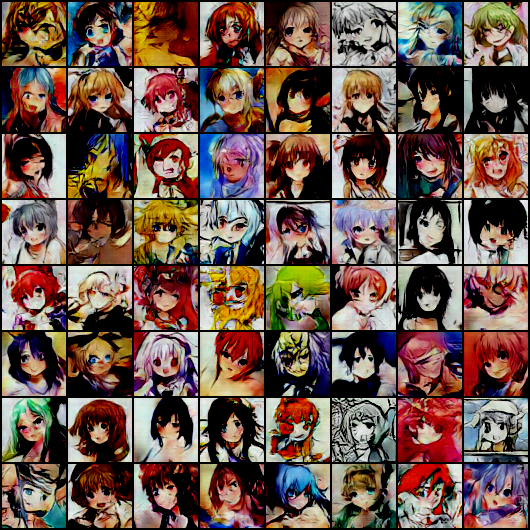

In [282]:
img = Image.open("../DCgan/DCGANresults/fake_samples_epoch_079.png")


generator = Generator(16, upSampling)
generator.load_state_dict(torch.load('checkpoints/generator_final.pth'))

img

In [283]:
def convert_img(img_tensor, nrow):
#     img_tensor = img_tensor.cpu()
#     grid = vutils.make_grid(img_tensor, nrow=nrow, padding=2)
    img_tensor = unnormalize(img_tensor)
    im = unscale(img_tensor)
#     ndarr = grid.byte().transpose(0, 2).transpose(0, 1).numpy()
#     ndarr = grid.mul(0.5).add(0.5).mul(255).byte().transpose(0, 2).transpose(0, 1).numpy()
#     im = Image.fromarray(ndarr)
    return im

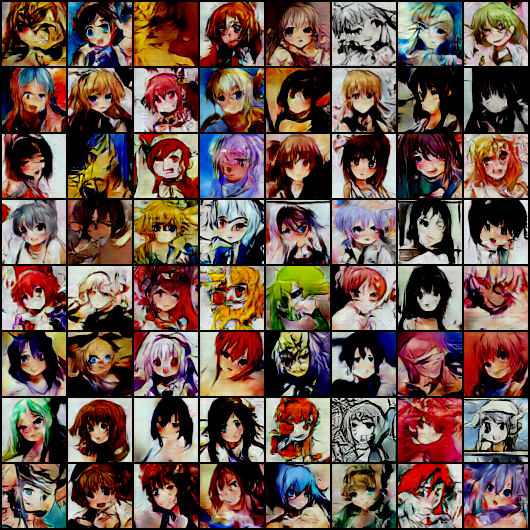

In [285]:
x = scale(transform(img))
low_res = Variable(scale(transform(img))).unsqueeze(0)

low_im = convert_img(x.data, 1)

low_im


In [286]:
high_res_fake = generator(Variable(low_res)).squeeze()

# unscale(high_res_fake)

im = convert_img(high_res_fake.data, 1)

im

RuntimeError: $ Torch: not enough memory: you tried to allocate 0GB. Buy new RAM! at /opt/conda/conda-bld/pytorch_1524590031827/work/aten/src/TH/THGeneral.c:218